# EDA: Exploratory Data Analysis

EDA is the first step of Data Project (ML/Analytics) to explore and understand the data. 
Findings from EDA would instruct us how to do the:

1. Data Processing: Handle Missing Values, Outliers
2. Data Cleaning: Fix the format, remove duplications
3. Feature Engineering: Categorical to Numeric, Domain-knowledge features

We do all these with the belief that it will help to improve the performance of our modeling. 

> Reference (See the EDA on the step-by-step of ML Modeling): 
> [All-in-one Notebook for Common ML Algorithms](https://www.kaggle.com/maianhdang/all-in-one-notebook-common-ml-algorithms#%F0%9F%A7%AC-Linear-Regressions)


![eda-ml-process.png](./images/eda-ml-process.png)



## EDA Competencies

> Source: [HackerRank Skills Directory](https://www.hackerrank.com/skills-directory)

### Data Wrangling
Data Wrangling includes gathering, selecting, transforming data.

Tasks: Data cleaning, imputation, summarizetion, aggregation, normalization.

Tool: Pandas

1. Outlier/Abnomaly Detection: Apply outlier Detection techniques to find (and maybe replace if necessary)
2. Missing values: Find and replace missing value
3. Duplicate values in Data: Find and replace duplicate values
4. Categorical to numeric
5. Group data based on values
6. Concatenate data along an axis
7. Merge multiple datasets into a single dataset

### Data Visualization
Allows for exploring and understanding data

Tool: matplotlib, seaborn, plotly

1. Create Data Viz
2. Visualize Historgram / Distribution
3. Visualize Data trends (line chart)
4. Visualize Categorical 
5. Visualize Heatmap and other relationships among Variables

In [2]:
# Loading library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

In [3]:
# Load data 
data = pd.read_csv('./data/titanic_train.csv')
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

## Step 1: Preliminary Exploratory

For the first interaction with the data, we should check this: 

1. Origin of Data, Meaning of columns [HERE](https://www.kaggle.com/c/titanic/data)
2. Step 1: Understand the structure, data types, missing values, high-level statistics summary
3. Step 3-4: Deep-dive into Univariate and Multivatiate

In [4]:
## Check 1: Shape of Data
data.shape
print("data.shape={}".format(data.shape))
print("Our dataset contains {} rows and {} columns".format(data.shape[0], data.shape[1]))

data.shape=(891, 12)
Our dataset contains 891 rows and 12 columns


In [6]:
# Check 2: Data info (notice: Dtype, Null)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Check 3: Distribution
data.describe().T

count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   

                  max  
PassengerId  891.0000  
Survived       1.0000  
Pclass         3.0000  
Age           80.0000  
SibSp          8.0000  
Parch          6.0000  
Fare         512.3292

In [6]:
data.describe(include=['object']).T

count unique                          top freq
Name       891    891  Bowerman, Miss. Elsie Edith    1
Sex        891      2                         male  577
Ticket     891    681                     CA. 2343    7
Cabin      204    147                           G6    4
Embarked   889      3                            S  644

<Figure size 432x288 with 0 Axes>

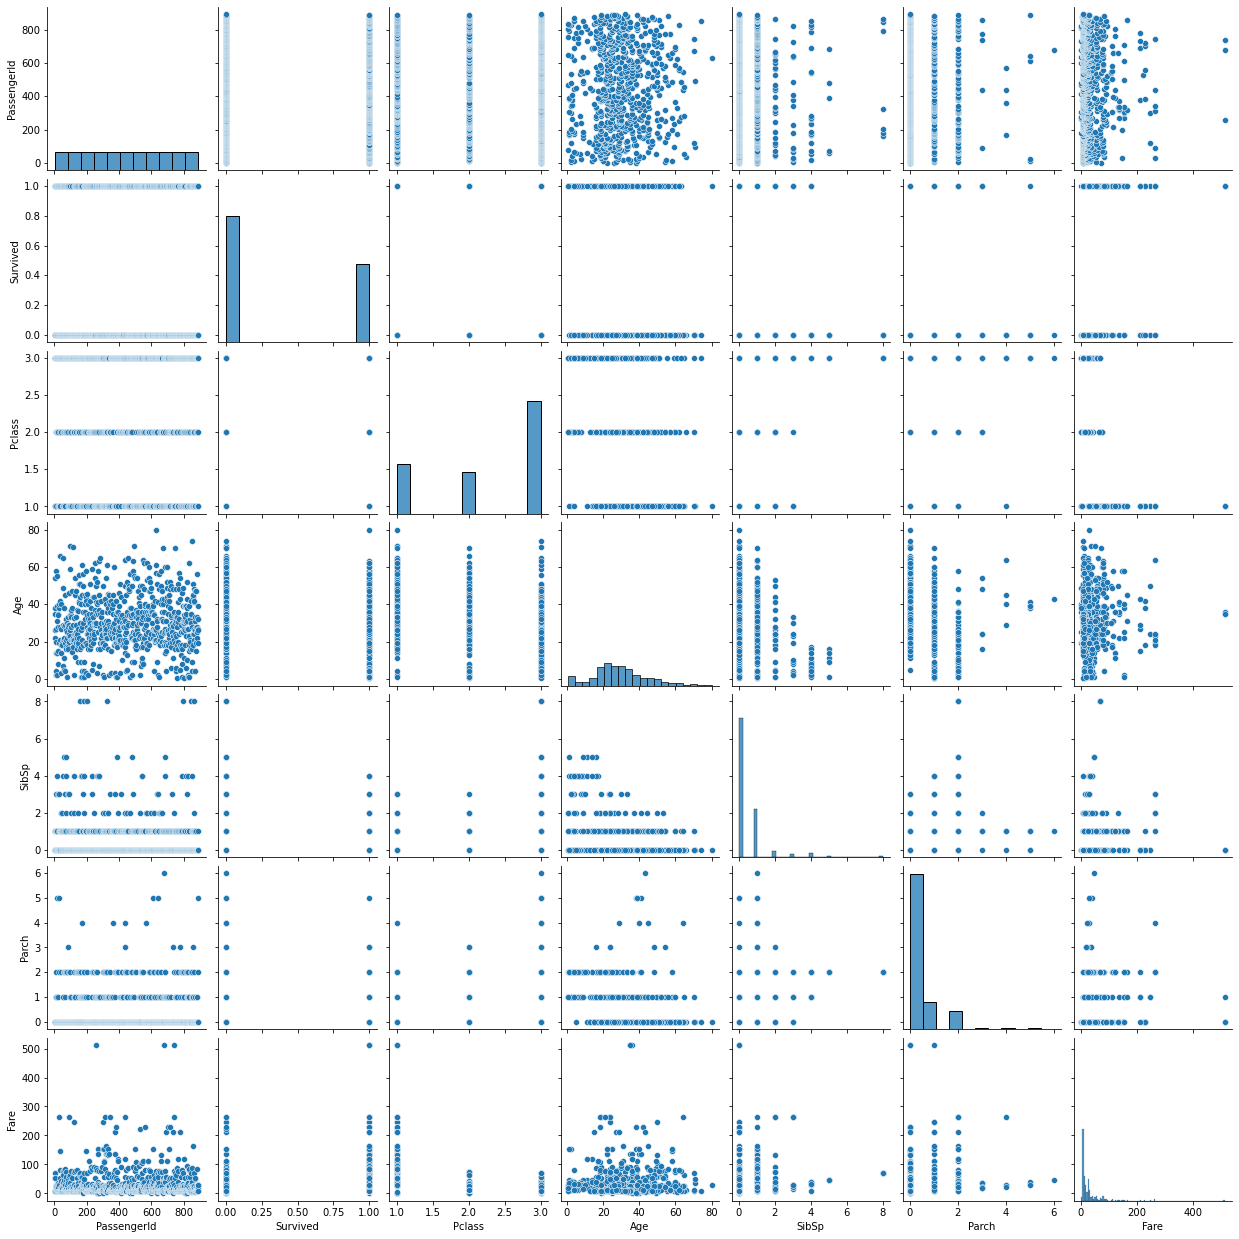

In [10]:
plt.figure()
sns.pairplot(data)
plt.show()

### Insights
* Data has 891 observations, and 11 features (columns) - both categorical and numerical 
    * Numerical: different in scale => May need to `scaler` before inputing to ML training 
    * Age/Fare: long-tail distribution => May need to treat `Outliers`
    * Missing Values: Cabin, Age
    * Categorical/Discrete Variable => May need to convert to numeric (`one-hot code`)
* 38% of survival rate => Target variable (`Y`)


In [15]:
#TODO: Where these insights come from (above analysis)?

## Step 2: Data Cleaning

### 2.1. Missing Values
* Drop features if missing rate is too high (cons: lose information)
* Drop rows if missing rate is low (cons: lose information)
* Impute by mean/median (cons: bias)
* Using ML algorithms (Clustering, kNN) and predict missing value (Read more: [HERE](https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e))

In [7]:
# Check Missing Values 
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# Cleaning Cabin - removing column
data_cleaned = data.drop(['Cabin'], axis=1)
# Cleaning Embarked - removing rows with missing values
data_cleaned = data_cleaned.dropna(subset=["Embarked"])
# Cleaning Age - replacing by mean value
data_cleaned["Age"] = data["Age"].fillna(data["Age"].median())

In [11]:
data_cleaned.info() ## No missing anymore

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


### 2.2. Remove Duplicated lines

In [16]:
# Find duplicated lines
data.duplicated().sum() # Returns 0 => there are no duplicated lines in the dataset


0

In [18]:
#data.drop_duplicates() # if there are duplicated lines in the data

Now, we move to further analysis. Connect all the steps we doing here by: 

* Upload the csv to Data Glimpse App: [HERE](https://share.streamlit.io/anhdanggit/streamlit-data-glimpse/main/app.py)
* Click `Generate Profiling Report`
    * **Univariate Analysis**: Distribution for each Variables, and the relationship with target variables 
    * **Multivariate Analysis**: Relationship among independent variables (X), such as: Interactions, Correlations

![data-profiling.png](./images/data-profiling.png)

## Step 3: Univariate Analysis

`Univariate (single variables) Analysis`. We do this for 2 main purposes:
* Understand the characteristics / distributions of a variables 
* Understand it's relationship with Target variables 

![univariate-analysis.png](./images/univariate-analysis.png)



### Categorical Variables 

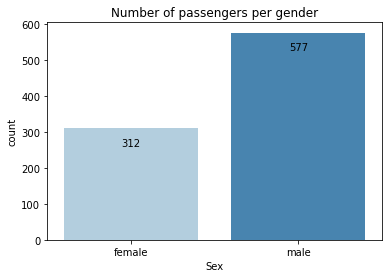

In [84]:
# Distribution: Plot the number of passengers per gender
sns.countplot(x='Sex',
              order=["female", "male"], 
              data=data_cleaned,
              palette="Blues")

# Write the labels on top
grouped_values = data_cleaned.groupby("Sex").Sex.count()
for label, value in enumerate(grouped_values):
    plt.text(label, value - 50, round(value,2), color='black', ha="center")

plt.title('Number of passengers per gender')
plt.show()


In [14]:
data_cleaned.groupby('Sex')['PassengerId'].count()

Sex
female    312
male      577
Name: PassengerId, dtype: int64

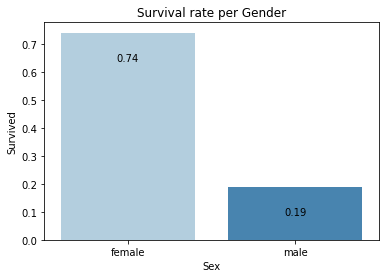

In [85]:
# Relationship with Target Var: Plot the Survival Rate per Sex
sns.barplot(x='Sex',
            y='Survived',
            order=["female", "male"],
            data=data_cleaned,
            ci=None, # Removing confidence intervals
            palette="Blues")

# Write the labels on top
grouped_values = data_cleaned.groupby("Sex").Survived.mean()
for idx, value in enumerate(grouped_values):
    plt.text(idx, value - 0.1, round(value,2), color='black', ha="center")
    
plt.title('Survival rate per Gender')
plt.show()

In [12]:
data_cleaned.groupby('Sex')['Survived'].mean()

Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64

### Continous Variables 

In [17]:
data_cleaned.Age.describe()

count    889.000000
mean      29.315152
std       12.984932
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

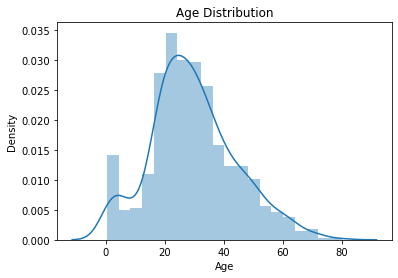

In [108]:
# Distribution
sns.distplot(data.loc[data['Age'].notnull(), 'Age'])
plt.title('Age Distribution')
plt.show()

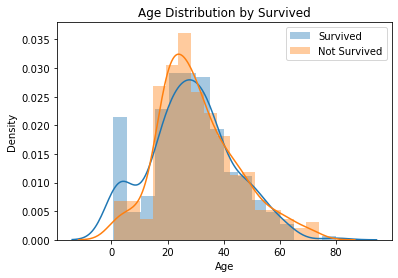

In [18]:
# Relationship with target
sns.distplot(data.loc[data['Age'].notnull() & (data['Survived'] == 1), 'Age'],
             label='Survived')
sns.distplot(data.loc[data['Age'].notnull() & (data['Survived'] == 0), 'Age'],
             label='Not Survived')
plt.title('Age Distribution by Survived')
plt.legend()
plt.show()

## Step 4: Multivariate Analysis

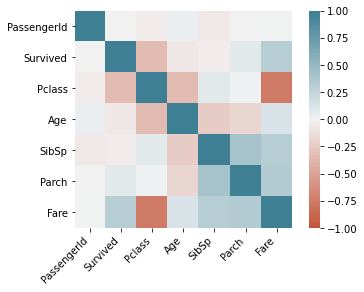

In [97]:
## Correlation Matrix
corr = data_cleaned.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

<AxesSubplot:>

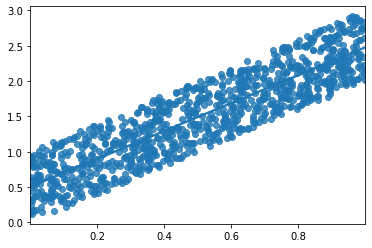

In [113]:
## Single Regression 
x1 = np.random.rand(1000)
x2 = x1 * 2 + np.random.rand(1000)
sns.regplot(x1, x2)

In [115]:
## Group by x Aggregate (Pivot)
data_cleaned.groupby('Sex')['Age'].mean()

Sex
female    28.149209
male      30.164975
Name: Age, dtype: float64

In [116]:
data_cleaned.groupby(['Sex','Age'])['Survived'].mean()

Sex     Age 
female  6.0     0.739130
        7.0     1.000000
        8.0     0.500000
        9.0     0.000000
        10.0    0.000000
                  ...   
male    49.0    0.500000
        50.0    0.200000
        51.0    0.166667
        52.0    0.250000
        54.0    0.108108
Name: Survived, Length: 109, dtype: float64

In [20]:
data_cleaned['Age_cat'] = pd.cut(data_cleaned.Age, [0, 10, 20, 30, 40, 50, 60, 70]) # cut by specific values (not necessary equal bin)
data_cleaned.groupby(['Sex','Age_cat'])['Survived'].mean()

Sex     Age_cat 
female  (0, 10]     0.612903
        (10, 20]    0.739130
        (20, 30]    0.723881
        (30, 40]    0.833333
        (40, 50]    0.677419
        (50, 60]    0.928571
        (60, 70]    1.000000
male    (0, 10]     0.575758
        (10, 20]    0.144928
        (20, 30]    0.142857
        (30, 40]    0.230000
        (40, 50]    0.218182
        (50, 60]    0.142857
        (60, 70]    0.071429
Name: Survived, dtype: float64

## Step 5: Futher Data Processing / Feature Engineering

### 5.1. Outliers 

* [Detect & Treat Outliers in Python](https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-3-dcb54abaf7b0)

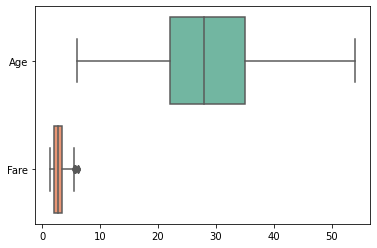

In [27]:
df_plot = data_cleaned[['Age','Fare']]
ax = sns.boxplot(data=df_plot, orient='h', palette='Set2') ## we can use boxplot to detect outlier (or look at the distribution)

In [21]:
p005  = np.quantile(data_cleaned.Age, 0.05)
p095  = np.quantile(data_cleaned.Age, 0.95)
print('percentile 0.05: {}'.format(p005))
print('percentile 0.95: {}'.format(p095))
print('min: {}'.format(data_cleaned.Age.min()))
print('max: {}'.format(data_cleaned.Age.max()))

percentile 0.05: 6.0
percentile 0.95: 54.0
min: 0.42
max: 80.0


In [22]:
# Treat Outliers by winsorize (replace the extreme values by percentiles value)
from scipy.stats.mstats import winsorize 
data_cleaned['Age'] = winsorize(data_cleaned.Age, limits=[0.05, 0.05]) # extreme low replaced by p0.05, extreme high by 0.95

In [23]:
p005  = np.quantile(data_cleaned.Age, 0.05)
p095  = np.quantile(data_cleaned.Age, 0.95)
print('percentile 0.05: {}'.format(p005))
print('percentile 0.95: {}'.format(p095))
print('min: {}'.format(data_cleaned.Age.min()))
print('max: {}'.format(data_cleaned.Age.max()))

percentile 0.05: 6.0
percentile 0.95: 54.0
min: 6.0
max: 54.0


In [24]:
# Treat Outliers by Log Transformation
data_cleaned['Fare'] = np.log(data_cleaned.Fare)

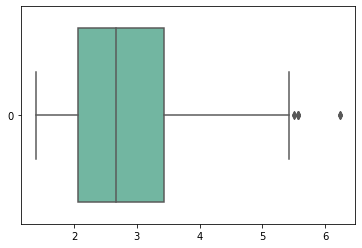

In [25]:
df_plot = data_cleaned[['Age','Fare']]
ax = sns.boxplot(data=df_plot.Fare, orient='h', palette='Set2') ## we can use boxplot to detect outlier (or look at the distribution)

### 5.2. Categorical to/from Numeric

In [124]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 115.6+ KB


In [126]:
pd.qcut(data_cleaned.Age, q=5) # bin numeric into categorical, with equal n per bin

0        (20.0, 28.0]
1      (29.699, 38.0]
2        (20.0, 28.0]
3      (29.699, 38.0]
4      (29.699, 38.0]
            ...      
886      (20.0, 28.0]
887     (5.999, 20.0]
888    (28.0, 29.699]
889      (20.0, 28.0]
890    (29.699, 38.0]
Name: Age, Length: 889, dtype: category
Categories (5, interval[float64]): [(5.999, 20.0] < (20.0, 28.0] < (28.0, 29.699] < (29.699, 38.0] < (38.0, 54.0]]

In [127]:
pd.cut(data_cleaned.Age, [5, 20, 30, 40]) # cut by specific values (not necessary equal bin)

0      (20, 30]
1      (30, 40]
2      (20, 30]
3      (30, 40]
4      (30, 40]
         ...   
886    (20, 30]
887     (5, 20]
888    (20, 30]
889    (20, 30]
890    (30, 40]
Name: Age, Length: 889, dtype: category
Categories (3, interval[int64]): [(5, 20] < (20, 30] < (30, 40]]

In [26]:
data_cleaned.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [123]:
pd.get_dummies(data_cleaned.Embarked)  # One-hot code to convert categorical to numeric

C  Q  S
0    0  0  1
1    1  0  0
2    0  0  1
3    0  0  1
4    0  0  1
..  .. .. ..
886  0  0  1
887  0  0  1
888  0  0  1
889  1  0  0
890  0  1  0

[889 rows x 3 columns]

### 5.3. Scaler & Preprocessing Pipeline

To make sure variables have the same scales 


In [78]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Split data
X = data_cleaned[['Age']]
y = data_cleaned.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipeline = Pipeline([
    ('std_scalar', StandardScaler()),
    # ('minmax_scaler', MinMaxScaler()), 
    #('pca', PCA(n_components=2, random_state=42))
])

## Can add as step to the pipeline: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

X_train = pipeline.fit_transform(X_train)


(array([ 49.,  10.,  66.,  86., 175.,  68.,  46.,  37.,  32.,  53.]),
 array([-1.98416943, -1.58147622, -1.178783  , -0.77608979, -0.37339658,
         0.02929664,  0.43198985,  0.83468307,  1.23737628,  1.6400695 ,
         2.04276271]),
 <BarContainer object of 10 artists>)

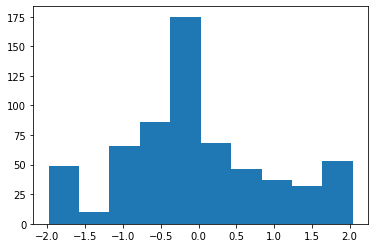

In [80]:
plt.hist(X_train)

(array([15.,  9., 30., 36., 85., 27., 25., 11.,  9., 20.]),
 array([-2.65399669, -2.62021298, -2.58642926, -2.55264555, -2.51886184,
        -2.48507812, -2.45129441, -2.4175107 , -2.38372698, -2.34994327,
        -2.31615956]),
 <BarContainer object of 10 artists>)

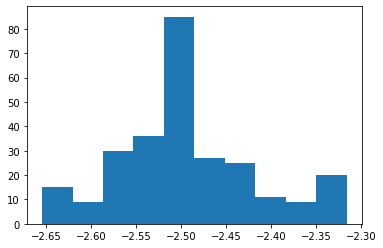

In [81]:
X_test = pipeline.transform(X_test)
plt.hist(X_test)